# Approche Deep Learning

Nous proposons une approche élégante en utilisant les réseaux de neurones convolutionnels directements appliqués aux images issues des plot des landmarks.
Cette approche élégante sera conduite de manière la plus optimisée possible.

Il y a aura  deux types d'images :
- les plot avec des points noirs
- les plot avec les points colorés délimitant les différentes zones du visage (annotation manuelle des images)

Ce notebook comprendra une approche directe (pas d'augmentation, pas/peu d'optimisation d'hyperparametres) et un approche avancée (data augmentation, architecture optimisée) et si le temps le permet du fine tuning ou transfert learning vers d'autres backbones plus avancés.

## Librairies

In [36]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

# DATA IS IN BLACK AND WHITE
### Data generation and preprocessing
## NO DATA AUGMENTATION

In [37]:
#### SUPER IMPORTANT TO EXECUTE OTHERWISE FACES MIGHT BE RGB
import save_face_img

save_face_img.create_faces(color_mode="bw")

  0%|          | 0/353 [00:00<?, ?it/s]

100%|██████████| 353/353 [00:54<00:00,  6.42it/s]


<Figure size 640x480 with 0 Axes>

In [38]:
# Data Preparation NO AUGMENTATION
train_datagen =         ImageDataGenerator(rescale=1./255)
test_datagen =          ImageDataGenerator(rescale=1./255)

train_generator =       train_datagen.flow_from_directory(
                        r'../CK+_lands/images/train/',
                        target_size=(150, 150),
                        batch_size=32,
                        class_mode='categorical')

validation_generator =  test_datagen.flow_from_directory(
                        r'../CK+_lands/images/val/',
                        target_size=(150, 150),
                        batch_size=32,
                        class_mode='categorical')

Found 298 images belonging to 6 classes.
Found 15 images belonging to 6 classes.


### Building / Compiling / Fitting model

In [39]:
# Model Building
model =     Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPool2D(pool_size=2, strides=2, padding="valid"))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2, padding="valid"))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2, padding="valid"))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2, padding="valid"))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))

# Compilation
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 17, 17, 128)      

In [40]:
from keras.callbacks import EarlyStopping

pat = 5 #this is the number of epochs with no improvment after which the training will stop
early_stopping = EarlyStopping(monitor='val_loss', patience=pat, verbose=1)

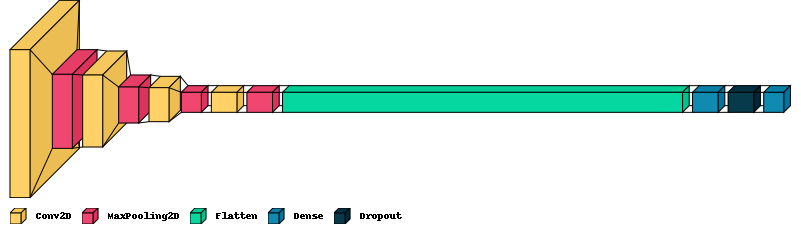

In [41]:
import visualkeras
visualkeras.layered_view(model, legend=True, scale_xy=1)

### Fitting model

In [42]:
history = model.fit(train_generator, epochs=100, validation_data=validation_generator, callbacks=early_stopping) 

Epoch 1/100
10/10 [==============================] - 9s 629ms/step - loss: 1.8311 - accuracy: 0.2282 - val_loss: 1.7629 - val_accuracy: 0.2667
Epoch 2/100
10/10 [==============================] - 6s 575ms/step - loss: 1.7611 - accuracy: 0.2248 - val_loss: 1.7462 - val_accuracy: 0.2667
Epoch 3/100
10/10 [==============================] - 6s 532ms/step - loss: 1.7593 - accuracy: 0.2383 - val_loss: 1.7280 - val_accuracy: 0.4000
Epoch 4/100
10/10 [==============================] - 6s 549ms/step - loss: 1.7302 - accuracy: 0.2752 - val_loss: 1.7136 - val_accuracy: 0.2667
Epoch 5/100
10/10 [==============================] - 6s 595ms/step - loss: 1.7163 - accuracy: 0.2886 - val_loss: 1.7013 - val_accuracy: 0.4667
Epoch 6/100
10/10 [==============================] - 6s 552ms/step - loss: 1.6633 - accuracy: 0.4060 - val_loss: 1.4809 - val_accuracy: 0.4000
Epoch 7/100
10/10 [==============================] - 6s 536ms/step - loss: 1.2936 - accuracy: 0.5268 - val_loss: 0.8526 - val_accuracy: 0.7333

In [43]:
# model.save('emotion_classifier_model.h5')  

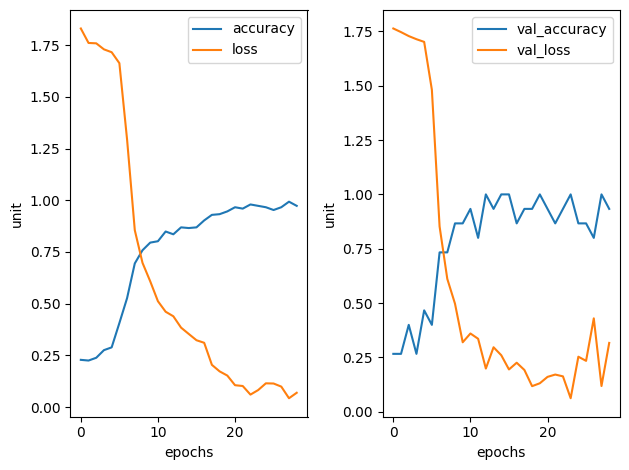

In [44]:
import matplotlib.pyplot as plt

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('epochs')
plt.ylabel('unit')
plt.legend()
plt.plot(history.history['loss'], label='loss')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('epochs')
plt.ylabel('unit')
plt.legend()
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.tight_layout()



In [45]:
test_datagen =          ImageDataGenerator(rescale=1./255)

test_generator =        test_datagen.flow_from_directory(
                        r'../CK+_lands/images/test/',
                        target_size=(150, 150),
                        batch_size=1,
                        class_mode='categorical')

evaluation =            model.evaluate(test_generator)

print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])

Found 15 images belonging to 6 classes.


15/15 [==============================] - 0s 18ms/step - loss: 1.2608 - accuracy: 0.8000
Test Loss: 1.2607516050338745
Test Accuracy: 0.800000011920929


## WITH DATA AUGMENTATION

In [46]:
# Data Preparation and augmentation
train_datagen_augmented =         ImageDataGenerator(rescale=1./255,
                                        shear_range=0.2,
                                        zoom_range=0.2,
                                        horizontal_flip=True,
                                        rotation_range=15,
                                        width_shift_range=0.1,
                                        height_shift_range=0.1)

test_datagen =          ImageDataGenerator(rescale=1./255)

train_generator_augmented =       train_datagen_augmented.flow_from_directory(
                        r'../CK+_lands/images/train/',
                        target_size=(150, 150),
                        batch_size=32,
                        class_mode='categorical')

validation_generator =  test_datagen.flow_from_directory(
                        r'../CK+_lands/images/val/',
                        target_size=(150, 150),
                        batch_size=32,
                        class_mode='categorical')

Found 298 images belonging to 6 classes.


Found 15 images belonging to 6 classes.


In [47]:
# Model Building
model2 =     Sequential()
model2.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
model2.add(MaxPool2D(pool_size=2, strides=2, padding="valid"))
model2.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model2.add(MaxPool2D(pool_size=2, strides=2, padding="valid"))
model2.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model2.add(MaxPool2D(pool_size=2, strides=2, padding="valid"))
model2.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model2.add(MaxPool2D(pool_size=2, strides=2, padding="valid"))
model2.add(Flatten())
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(6, activation='softmax'))

# Compilation
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 17, 17, 128)      

In [48]:
history = model2.fit(train_generator_augmented, epochs=100, validation_data=validation_generator) 

Epoch 1/100
10/10 [==============================] - 11s 820ms/step - loss: 1.8524 - accuracy: 0.2416 - val_loss: 1.7435 - val_accuracy: 0.2667
Epoch 2/100
10/10 [==============================] - 8s 727ms/step - loss: 1.7379 - accuracy: 0.2416 - val_loss: 1.7779 - val_accuracy: 0.2667
Epoch 3/100
10/10 [==============================] - 7s 705ms/step - loss: 1.7653 - accuracy: 0.2550 - val_loss: 1.7490 - val_accuracy: 0.2667
Epoch 4/100
10/10 [==============================] - 7s 708ms/step - loss: 1.7577 - accuracy: 0.2584 - val_loss: 1.7490 - val_accuracy: 0.2667
Epoch 5/100
10/10 [==============================] - 7s 702ms/step - loss: 1.7553 - accuracy: 0.2450 - val_loss: 1.7431 - val_accuracy: 0.2667
Epoch 6/100
10/10 [==============================] - 7s 708ms/step - loss: 1.7513 - accuracy: 0.2517 - val_loss: 1.7445 - val_accuracy: 0.2667
Epoch 7/100
10/10 [==============================] - 8s 743ms/step - loss: 1.7497 - accuracy: 0.2550 - val_loss: 1.7385 - val_accuracy: 0.266

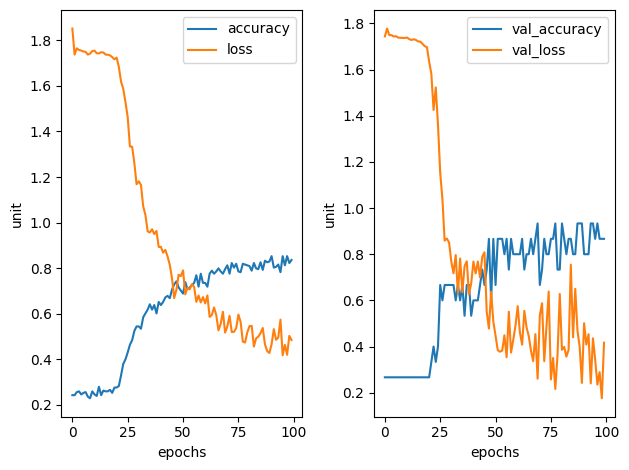

In [49]:
import matplotlib.pyplot as plt

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('epochs')
plt.ylabel('unit')
plt.legend()
plt.plot(history.history['loss'], label='loss')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('epochs')
plt.ylabel('unit')
plt.legend()
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.tight_layout()



In [50]:
test_datagen =          ImageDataGenerator(rescale=1./255)

test_generator =        test_datagen.flow_from_directory(
                        r'../CK+_lands/images/test/',
                        target_size=(150, 150),
                        batch_size=1,
                        class_mode='categorical')

evaluation =            model2.evaluate(test_generator)

print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])

Found 15 images belonging to 6 classes.


15/15 [==============================] - 0s 14ms/step - loss: 0.8118 - accuracy: 0.8000
Test Loss: 0.8118020296096802
Test Accuracy: 0.800000011920929


# DATA HAS COLORED ZONES (cf report figs)

In [51]:
#### SUPER IMPORTANT TO EXECUTE OTHERWISE FACES MIGHT BE B&W
import save_face_img

save_face_img.create_faces(color_mode="rgb")

100%|██████████| 353/353 [02:00<00:00,  2.93it/s]


<Figure size 640x480 with 0 Axes>

In [52]:
# Data Preparation NO AUGMENTATION
train_datagen =         ImageDataGenerator(rescale=1./255)
test_datagen =          ImageDataGenerator(rescale=1./255)

train_generator =       train_datagen.flow_from_directory(
                        r'../CK+_lands/images/train/',
                        target_size=(150, 150),
                        batch_size=32,
                        class_mode='categorical')

validation_generator =  test_datagen.flow_from_directory(
                        r'../CK+_lands/images/val/',
                        target_size=(150, 150),
                        batch_size=32,
                        class_mode='categorical')

Found 298 images belonging to 6 classes.


Found 15 images belonging to 6 classes.


In [53]:
# Model Building
model3 =     Sequential()
model3.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
model3.add(MaxPool2D(pool_size=2, strides=2, padding="valid"))
model3.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model3.add(MaxPool2D(pool_size=2, strides=2, padding="valid"))
model3.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model3.add(MaxPool2D(pool_size=2, strides=2, padding="valid"))
model3.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model3.add(MaxPool2D(pool_size=2, strides=2, padding="valid"))
model3.add(Flatten())
model3.add(Dense(256, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(6, activation='softmax'))

# Compilation
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 17, 17, 128)      

In [54]:
from keras.callbacks import EarlyStopping

pat = 5 #this is the number of epochs with no improvment after which the training will stop
early_stopping = EarlyStopping(monitor='val_loss', patience=pat, verbose=1)

In [55]:
history = model3.fit(train_generator, epochs=100, validation_data=validation_generator, callbacks=early_stopping) 

Epoch 1/100
10/10 [==============================] - 10s 752ms/step - loss: 1.8802 - accuracy: 0.2349 - val_loss: 1.7501 - val_accuracy: 0.2667
Epoch 2/100
10/10 [==============================] - 7s 724ms/step - loss: 1.7685 - accuracy: 0.2282 - val_loss: 1.7487 - val_accuracy: 0.2000
Epoch 3/100
10/10 [==============================] - 7s 697ms/step - loss: 1.7514 - accuracy: 0.2315 - val_loss: 1.7596 - val_accuracy: 0.2667
Epoch 4/100
10/10 [==============================] - 7s 722ms/step - loss: 1.7584 - accuracy: 0.2819 - val_loss: 1.7390 - val_accuracy: 0.2667
Epoch 5/100
10/10 [==============================] - 8s 787ms/step - loss: 1.7486 - accuracy: 0.2450 - val_loss: 1.7404 - val_accuracy: 0.2667
Epoch 6/100
10/10 [==============================] - 8s 790ms/step - loss: 1.7399 - accuracy: 0.2383 - val_loss: 1.7394 - val_accuracy: 0.2667
Epoch 7/100
10/10 [==============================] - 8s 886ms/step - loss: 1.7457 - accuracy: 0.2685 - val_loss: 1.7402 - val_accuracy: 0.266

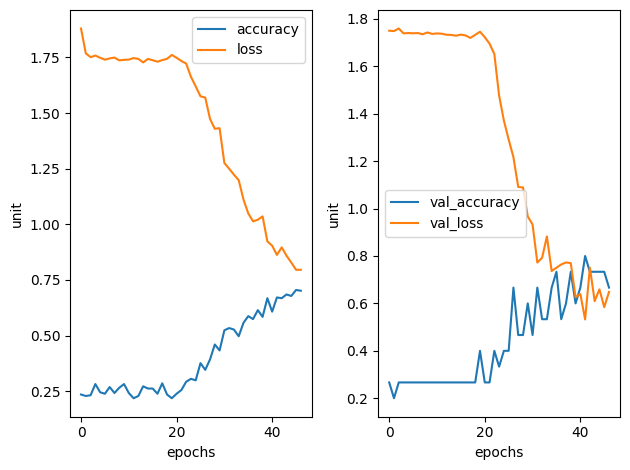

In [56]:
import matplotlib.pyplot as plt

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('epochs')
plt.ylabel('unit')
plt.legend()
plt.plot(history.history['loss'], label='loss')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('epochs')
plt.ylabel('unit')
plt.legend()
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.tight_layout()



In [57]:
test_datagen =          ImageDataGenerator(rescale=1./255)

test_generator =        test_datagen.flow_from_directory(
                        r'../CK+_lands/images/test/',
                        target_size=(150, 150),
                        batch_size=1,
                        class_mode='categorical')

evaluation =            model3.evaluate(test_generator)

print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])

Found 15 images belonging to 6 classes.
 5/15 [=========>....................] - ETA: 0s - loss: 2.2621 - accuracy: 0.4000

15/15 [==============================] - 0s 16ms/step - loss: 1.1062 - accuracy: 0.6000
Test Loss: 1.1061583757400513
Test Accuracy: 0.6000000238418579


## Model tuning via GridSearch

In [58]:
#libs
import numpy as np
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

In [59]:
#create model
def create_model(activation='relu'):
    # for computational purposes we will use a very simple model
    model3 =     Sequential()
    model3.add(Conv2D(32, kernel_size=(3, 3), activation=activation,vinput_shape=(150, 150, 3)))
    model3.add(MaxPool2D(pool_size=2, strides=2, padding="valid"))
    model3.add(Flatten())
    model3.add(Dense(256, activation=activation))
    model3.add(Dropout(0.5))
    model3.add(Dense(6, activation='softmax'))

    # Compilation
    model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model3

In [61]:
import tqdm
batch_size = 1
X_train, y_train = next(train_generator)
X_val, y_val = next(validation_generator)
for i in tqdm.tqdm(range(int(train_generator.n/batch_size)-1)): 
  img, label = next(train_generator)
  X_train = np.append(X_train, img, axis=0 )
  y_train = np.append(y_train, label, axis=0)
for i in tqdm.tqdm(range(int(validation_generator.n/1)-1)): 
  img, label = next(validation_generator)
  X_val = np.append(X_val, img, axis=0 )
  y_val = np.append(y_val, label, axis=0)


100%|██████████| 14/14 [00:01<00:00,  9.76it/s]


In [63]:
## TOO LONG AND VERSION ISSUES WITH SCIKERAS AND PYTHON 8.
# model = KerasClassifier(model=create_model, epochs=100, batch_size=10, verbose=0, callbacks=early_stopping)
# # define the grid search parameters
# activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
# param_grid = dict(model__activation=activation)
# grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
# grid_result = grid.fit(X_train, y_train)
# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmpaxv79gg6\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmpaxv79gg6\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmpshpevm1n\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmpshpevm1n\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmpf5z8pjcp\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmpf5z8pjcp\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmp3paada72\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmp3paada72\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmpf3e04em5\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmpf3e04em5\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmpmk7lksun\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmpmk7lksun\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmph3yl0ni_\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmph3yl0ni_\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmpsrd7c52r\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmpsrd7c52r\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmpz54myhz7\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmpz54myhz7\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmp5dz2tses\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmp5dz2tses\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmpd2d84r3c\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmpd2d84r3c\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmp_mum9qhl\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmp_mum9qhl\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmpwimzqsx3\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmpwimzqsx3\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmpjqoj27w0\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmpjqoj27w0\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmppxz831d6\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmppxz831d6\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmpnzi8q30m\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmpnzi8q30m\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmp6sujm28r\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmp6sujm28r\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmpk12wy81z\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmpk12wy81z\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmpvmhhc7h7\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmpvmhhc7h7\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmpq9c6mpq3\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmpq9c6mpq3\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmp6j2uxizg\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmp6j2uxizg\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmphsdz4ctq\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmphsdz4ctq\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmpsj9oq85c\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmpsj9oq85c\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmpy1ep44d5\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmpy1ep44d5\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmp8335sv5u\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmp8335sv5u\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmphyncud7r\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmphyncud7r\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmp85olj1kj\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmp85olj1kj\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmp7jff557m\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmp7jff557m\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmpqln5b7nt\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmpqln5b7nt\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmph57qbbqt\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmph57qbbqt\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmprywq7g7m\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmprywq7g7m\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmpx9s1c_5m\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmpx9s1c_5m\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmpok5g66f4\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmpok5g66f4\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmp5cj_jl5r\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmp5cj_jl5r\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmprx_w7pgd\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmprx_w7pgd\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmp1vz0mffb\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmp1vz0mffb\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmpradl4hvv\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmpradl4hvv\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmpt7ik8yp8\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmpt7ik8yp8\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmp6jwqcxk1\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmp6jwqcxk1\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmph94a7df8\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmph94a7df8\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmpb6_fry1m\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmpb6_fry1m\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmplh5w13mu\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmplh5w13mu\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmp07yc79lc\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmp07yc79lc\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmpp0rgehex\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmpp0rgehex\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmpzkdptfh5\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmpzkdptfh5\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmpi0a6heyf\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmpi0a6heyf\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmpvcfgbwib\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmpvcfgbwib\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmp7ovqpvrj\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmp7ovqpvrj\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmpdrd35eu8\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmpdrd35eu8\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmpkjbgsbz1\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmpkjbgsbz1\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmprzp4zvte\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmprzp4zvte\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmp75ny09_v\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmp75ny09_v\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmpqv7n5xeg\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmpqv7n5xeg\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmpd8cmwqva\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmpd8cmwqva\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmpjk7g4hae\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmpjk7g4hae\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmp41x40vpg\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmp41x40vpg\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmp8z52eul9\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmp8z52eul9\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmpt_cckzl1\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmpt_cckzl1\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmp_ju2zan1\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmp_ju2zan1\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmphcjz915x\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmphcjz915x\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmp6whwkuda\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmp6whwkuda\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmpe3bx92pd\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmpe3bx92pd\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmpkdk26tx0\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmpkdk26tx0\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmpmtnkoekk\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmpmtnkoekk\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmpvcn4_dh8\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmpvcn4_dh8\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmplui6_la5\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmplui6_la5\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmpf7eawblb\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmpf7eawblb\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmpa1vlf4ez\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmpa1vlf4ez\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmp8cb87o44\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmp8cb87o44\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmpafksbz6c\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmpafksbz6c\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmpefnw044f\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmpefnw044f\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmppgk0s_7t\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmppgk0s_7t\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmp1rbah046\assets


INFO:tensorflow:Assets written to: C:\Users\pierr\AppData\Local\Temp\tmp1rbah046\assets


ValueError: 
All the 24 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Work\Deep-RL-class\deep-rl-class-main\deep-rl-class-main\.conda\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Work\Deep-RL-class\deep-rl-class-main\deep-rl-class-main\.conda\lib\site-packages\scikeras\wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "c:\Work\Deep-RL-class\deep-rl-class-main\deep-rl-class-main\.conda\lib\site-packages\scikeras\wrappers.py", line 760, in fit
    self._fit(
  File "c:\Work\Deep-RL-class\deep-rl-class-main\deep-rl-class-main\.conda\lib\site-packages\scikeras\wrappers.py", line 915, in _fit
    X, y = self._initialize(X, y)
  File "c:\Work\Deep-RL-class\deep-rl-class-main\deep-rl-class-main\.conda\lib\site-packages\scikeras\wrappers.py", line 852, in _initialize
    self.model_ = self._build_keras_model()
  File "c:\Work\Deep-RL-class\deep-rl-class-main\deep-rl-class-main\.conda\lib\site-packages\scikeras\wrappers.py", line 429, in _build_keras_model
    model = final_build_fn(**build_params)
  File "C:\Users\pierr\AppData\Local\Temp\ipykernel_9400\4087510746.py", line 5, in create_model
  File "c:\Work\Deep-RL-class\deep-rl-class-main\deep-rl-class-main\.conda\lib\site-packages\keras\src\dtensor\utils.py", line 96, in _wrap_function
    init_method(layer_instance, *args, **kwargs)
  File "c:\Work\Deep-RL-class\deep-rl-class-main\deep-rl-class-main\.conda\lib\site-packages\keras\src\layers\convolutional\conv2d.py", line 179, in __init__
    super().__init__(
  File "c:\Work\Deep-RL-class\deep-rl-class-main\deep-rl-class-main\.conda\lib\site-packages\keras\src\layers\convolutional\base_conv.py", line 118, in __init__
    super().__init__(
  File "c:\Work\Deep-RL-class\deep-rl-class-main\deep-rl-class-main\.conda\lib\site-packages\tensorflow\python\trackable\base.py", line 204, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "c:\Work\Deep-RL-class\deep-rl-class-main\deep-rl-class-main\.conda\lib\site-packages\keras\src\engine\base_layer.py", line 340, in __init__
    generic_utils.validate_kwargs(kwargs, allowed_kwargs)
  File "c:\Work\Deep-RL-class\deep-rl-class-main\deep-rl-class-main\.conda\lib\site-packages\keras\src\utils\generic_utils.py", line 514, in validate_kwargs
    raise TypeError(error_message, kwarg)
TypeError: ('Keyword argument not understood:', 'vinput_shape')
